In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/Users/xiaofanjiao/Downloads/hotel_bookings.csv")


# Data Cleaning
# Calculate the number of missing values for each column
missing_data = data.isna().sum()

# Calculate the percentage of missing values for each column
missing_data_percentage = (missing_data / len(data)) * 100

# Create a DataFrame with the number of missing values and their percentage
missing_data_df = pd.DataFrame({'Missing_Values': missing_data, 'Percentage': missing_data_percentage})

# Filter to include only those with missing values
missing_data_df = missing_data_df[missing_data_df['Missing_Values'] > 0]

# Sort by percentage of missing values in descending order
missing_data_df = missing_data_df.sort_values(by='Percentage', ascending=False)

# Drop 'company' & 'agent' columns; assuming we don't need them
data_cleaned = data.drop(columns=['company', 'agent'])

# Replacing missing 'children' values with mean
data_cleaned['children'].fillna(data_cleaned['children'].mean(), inplace=True)

# Replacing missing values in 'country' with its mode
def mode_country(x):
    return x.dropna().mode()[0]

country_mode = mode_country(data_cleaned['country'])
data_cleaned['country'].fillna(country_mode, inplace=True)

# Display or check a part of the data to confirm changes
print(data_cleaned.head())

   index         hotel  is_canceled  lead_time  arrival_date_year  \
0      0  Resort Hotel            0        342               2015   
1      1  Resort Hotel            0        737               2015   
2      2  Resort Hotel            0          7               2015   
3      3  Resort Hotel            0         13               2015   
4      4  Resort Hotel            0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  assigned_room_type  \
0                        0                   

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting the relevant features
features = ['stays_in_week_nights', 'lead_time', 'deposit_type', 
            'is_repeated_guest', 'previous_cancellations', 'market_segment']
target = 'is_canceled'

# Preprocessing for categorical data: one-hot encoding
categorical_features = ['deposit_type', 'market_segment']
numerical_features = ['stays_in_week_nights', 'lead_time', 'is_repeated_guest', 'previous_cancellations']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocessing data
X = preprocessor.fit_transform(data_cleaned[features])
y = data_cleaned[target]

# Splitting the dataset into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Verifying the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((71634, 15), (47756, 15), (71634,), (47756,))

In [17]:
# Fitting the SVM model
svm_model = svm.SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm_model.predict(X_test)

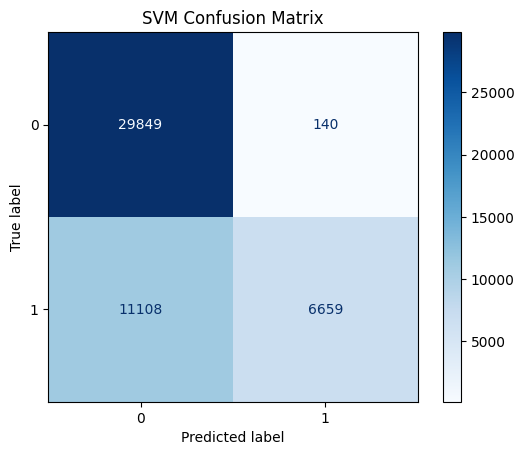

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title('SVM Confusion Matrix')
plt.show()



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Print the metrics, rounded to 2 decimal places
print("Accuracy: {:.2f}%".format(accuracy))
print("Precision: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("F1 Score: {:.2f}%".format(f1))


Accuracy: 76.45%
Precision: 97.94%
Recall: 37.48%
F1 Score: 54.21%


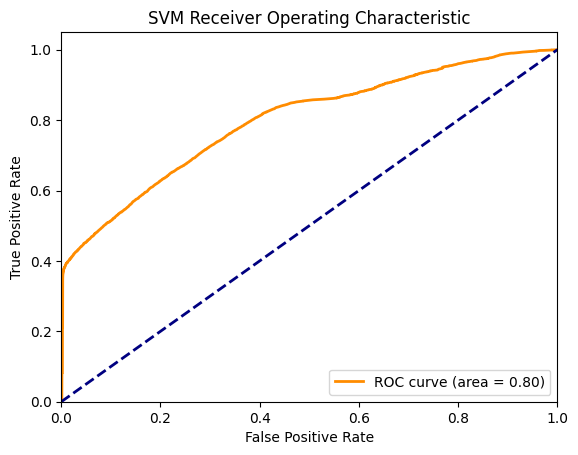

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming your model is svm_model and it is already fitted
# Check if your model can output probabilities or decision function
try:
    # Attempt to use decision function
    y_scores = svm_model.decision_function(X_test)
except AttributeError:
    # If decision function is not available, use predict_proba
    # Note: You need to have set probability=True when you created the SVM model
    y_scores = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


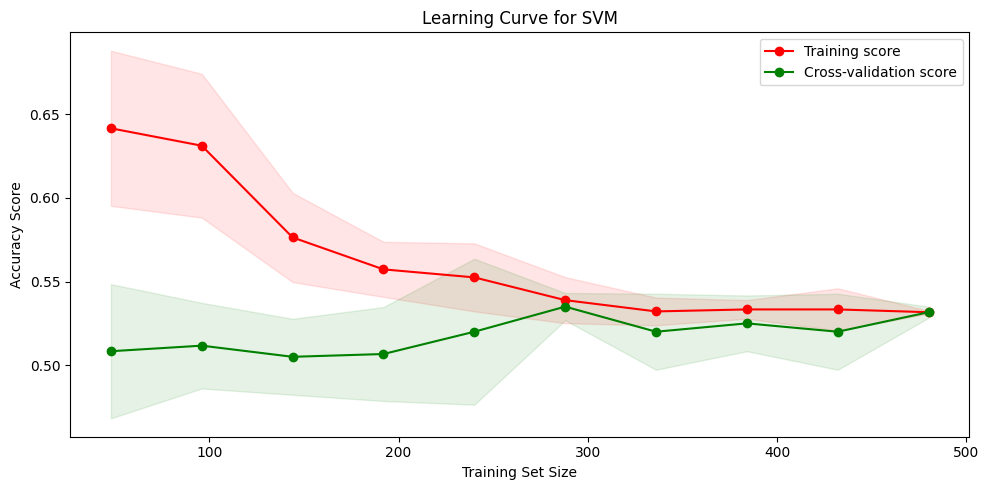

In [21]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Mocking up some data and a target variable to demonstrate the learning curve
# In the actual scenario, this data would be replaced with the real dataset
np.random.seed(42)  # For reproducible results
data_cleaned = np.random.rand(1000, 6)  # Assume we have 1000 samples and 6 features
target = np.random.randint(0, 2, 1000)  # Binary target variable

# Features selection based on the user's input
features = data_cleaned
y = target

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.4, random_state=42)

# Create SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Define training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    svm_model, X_train, y_train, train_sizes=train_sizes, cv=5,
    scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")

# Plot the standard deviation for training set
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

# Plot the standard deviation for validation set
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color="g")

# Create plot
plt.title("Learning Curve for SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
